# Random numbers

Monte Carlo methods heavily rely on random numbers. Classical computers can only execute deterministic operations. In particular they cannot be used to generate stochastic quantities like random variables. However it is possible to design deterministic algorithms capable to generate series of number that, to some extent, resemble random numbers. In practical applications a large number of random numbers is required. It is therefore essential of being able to generate good quality random numbers efficiently. This is not such an easy task!

Discussing all the practical and theoretical issues involved is beyond the scope of this introduction and we will rely on NumPy's built-in functions.

To avoid confusion, let's recall a couple of definitions:

- The **cumulative distribution function** $F(x)$ of a random process measures the probability for the outcome of an event to have a value less than or equal to $x$. Obviously we should have $F(x\rightarrow -\infty)=0$ and $F(x\rightarrow \infty)=1$.

- The **probability distribution function** measures how likely the outcome of an event "will be close" to $x$. More precisely, it is defined as the derivative of the cumulative distribution,
$$
p(x)=\frac{dF}{dx}(x)\Leftrightarrow F(x)=\int_{-\infty}^x p(y)dy.
$$
In other words, for small $\Delta x$, $p(x)\Delta x$ represents the probability for the event to have a value lying between $x$ and $x+\Delta x$.

## Uniform random distribution

The most basic distribution function is the uniform distribution. It describes a sequence of random numbers that are distributed in a given interval $[a,b]$ with equal probability. As $p(x)$ is a constant in the interval $[a,b]$ and $\int_{-\infty}^{\infty} p(x)dx = 1$, one has,
$$
p(x) = 
\begin{cases} \frac{1}{b-a} &\mbox{if } x\in [a,b] \\ 
0 & \mbox{otherwise } 
\end{cases} 
$$

Let us see how to produce such a distribution using Python. As usual, we first import a few libraries.

In [2]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
# Let's draw one random number
x = numpy.random.random_sample()

print(x)

0.9739656325066914


If you execute the above piece of code several times, you will notice that each time you will get a different number from 0 to 1. As the function `numpy.random.random_sample()` samples uniformly between 0 and 1, all the numbers in this interval have equal probabilities of being chosen (note that 0 is a possible output while 1 is excluded; one says that the numbers are drawn in the interval [0,1) instead of [0 1]). 

If you know in advance how many random numbers you would like to draw, you may also specify this as an option and `numpy.random.random_sample()` will return an appropriately sized array:

In [4]:
# We draw ten random numbers
x = numpy.random.random_sample(10)
print(x)

[ 0.05636905  0.66712134  0.1566894   0.73340241  0.63237983  0.72538527
  0.88206872  0.47220585  0.02159918  0.0415654 ]


### Are the numbers really random?

You may wonder how your computer is able to draw these random numbers and if they are really random. In fact, they are not. As we anticipated above, the internal algorithm produces a perfectly repeatable sequence of numbers that only look like random. In particular, after a (very) large number of draws, the sequence will repeat itself.

When you start Python (through the notebook for example), the system picks a starting place in the sequence and then produces all the following numbers in the sequence at each call of the `numpy.random.random_sample()` function. You may however pick the starting place in the sequence yourself and therefore draw a perfectly reproducible set of numbers. This is done by specifying the so-called 'seed' of the generator like this:

In [5]:
numpy.random.seed(0)
x = numpy.random.random_sample(10)
print(x)

[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548   0.64589411
  0.43758721  0.891773    0.96366276  0.38344152]


If you repeat the above piece of code several times, you will observe that the floats returned are always identical! The seed, 0 in this case, is an integer that fixes a starting place in the sequence of "pseudo-random" numbers. Choose a different value for the seed and see what happens.

Now try the following code:

In [6]:
numpy.random.seed(0)
x = numpy.random.random_sample(5)
print(x)
x = numpy.random.random_sample(5)
print(x)


[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
[ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]


Compare this to the previous 10 numbers generated (with seed=0). Do you see what is happening?

Setting the seed of the random number generator can be very useful if you want to debug a code and have a repeatable output. However, when you perform a real computation, you should let the system pick a seed at random based on the date and time for example. This is done each time python starts but you may also do it yourself by calling `numpy.random.seed()` without any argument.

### Uniform distribution in the interval [a,b)

Producing a sample of random numbers in the interval [a,b) instead of just [0,1) is easy. It is achieved by first drawing the numbers between 0 and 1 and then 'rescaling' the output:

In [7]:
a=5
b=20
x = numpy.random.random_sample(10000)
y = (b-a)*x+a
print(y)

[ 16.87587557  12.9334238   13.52066842 ...,  10.58037146   7.94258142
  17.10788368]


## Visualising the histogram of the random sample

Our little code above is designed to return a sample of numbers between 5 and 20 with equal probability and one therefore speaks of a uniform random distribution. A nice way of checking this consists in plotting the histogram of the random numbers generated. In a histogram, the interval of interest is first divided into smaller intervals called bins. For each bin, the histogram displays the number of occurances of the random sequence that have a value within the bin. Let's try it:

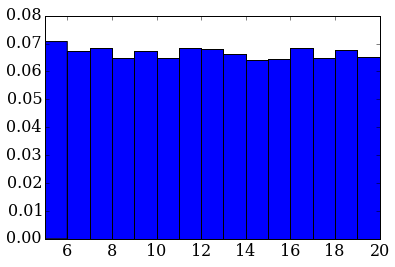

In [8]:
binwidth=1
pyplot.xlim(5,20)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

By examining the histogram you should be able to confirm how many random numbers drawn above fall in each bin (in this case we have created bins that span the intervals [i,i+1) where i are the integers between 5 and 19).

Of course, the above histogram is far from uniform; we only drew 10 random numbers so there was no chance of having the same number of occurances in each bin (we have 15 of them!). The distribution will only appear uniform if we draw a large amount of random numbers and the fluctuations in the histogram are smoothed out. Try it, redraw the histogram for 10000, or even 1000000 random numbers. 

Finally, you should draw the histogram with the option 'normed=True'. That way, all the values computed will be divided by the total number of random numbers drawn and provide the frequency of obtaining a random number in any given bin. As you increase the size of your random numbers sample and decrease the size of the bins, this frequency converges to the probability distribution function of the random numbers. Does it work?

## Generation of other random distributions

Although the uniform distribution is useful in many applications, one ofter requires the random numbers to be distributed according to another distrubtion. 

Two examples are the Gaussian distribution,

$$
p(x)=\frac{1}{\sigma \sqrt{2\pi}} e^{-\frac12 (\frac{x-\mu}{\sigma})^2},
$$
where $\mu$ is the mean of the distribution and $\sigma$ its standard deviation, or the exponential distribution,

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

where $\alpha$ is the rate parameter. Many other distributions are useful and interesting.

### Invertible distributions

When the cumulative distribution function F is known and can be explicitely inverted, it is easy to produce the corresponding random generator using a uniform random generator in $[0, 1]$.

Indeed, if the random process $X$ is distributed according to the uniform distribution we have $P(X<x)=U(x)$ with,
$$
U(x)=
\begin{cases} 
0 &\mbox{if } x<0 \\
x &\mbox{if } x\in [0,1] \\ 
1 &\mbox{if } x>1
\end{cases} 
$$

Say we want to generate a set of random numbers $Y$ for which the cumulative distribution is $F$. The trick to construct the set $Y$ is to apply $F^{-1}$ to the set $X$ since we then have,

\begin{align}
P(Y<y) &= P(F^{-1}(X)<y) \nonumber \\
&= P(X<F(y)) \nonumber \\
&= U(F(y)) \nonumber \\
&= F(y)\nonumber
\end{align}

The last equality shows that $Y$ has the required cumulative distribution function.

For example, take the exponential distribution. The cumulative distribution function is,
$$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

For $x\in [0, 1]$, the inverse of this distribution is thus,

$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

Let's see if that works.

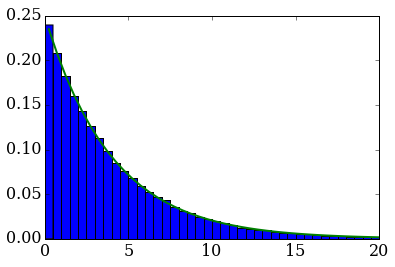

In [9]:
alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


What do you think?

### Von Neumann rejection method

In this method, one generates a set of random numbers with a given distribution $p_1(x)$, and then cleverly extracts from it a subset that obeys the desired distribution $p_2(x)$. In order for the method to work, there must exist a constant K such that we have, 

$$
{p_2(x)}\leq {Kp_1(x)},\quad \forall x.
$$

As an example, let us try to produce a set of numbers distributed according to the positive Gaussian distribution (meaning we only want positive numbers). For that purpose, we may use the exponential distribution (with rate parameter $\alpha =1$) as the starting distribution. Indeed, from the plot below, we see that the above criteria is met with $K=1.4$ ($K$ could have even been chosen a bit smaller).

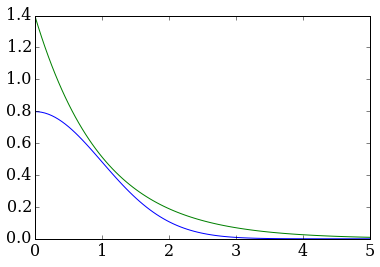

In [10]:
nx=100

xi =numpy.linspace(0,5,nx)

f1=2*numpy.exp(-xi**2/2.0)/numpy.sqrt(2*numpy.pi)
f2= 1.4*numpy.exp(-numpy.abs(xi))

pyplot.plot(xi,f1)
pyplot.plot(xi,f2)

The algorithm works as follows. 

1. We generate a number $x$ according to the exponential distribution.
2. We draw a random number $U$ between 0 and 1
3. We keep the number $x$ in our final set of randoms numbers if $U<\frac{p_2(x)}{Kp_1(x)}$.

The third step is the clever part. Imagine we draw a total of $N$ random numbers distributed according to $p_1$. In such a set, the number of times we observe a value $x_1$ in an interval $\Delta x$ centered around $x_1$ is about:

$$
n(x_1)\approx N p_1(x_1)\Delta x
$$

Because of step 3 this number will be reduced to

$$
n_f(x_1) \approx n(x_1) \frac{p_2(x_1)}{Kp_1(x)} = N\frac{p_2(x_1) \Delta x}{K}
$$

in the final set of random numbers. This implies that in this final set, the proportion of numbers centered around two values $x_1$ and $x_2$ is given by,

$$
\frac{n_f(x_1)}{n_f(x_2)}=\frac{p_2(x_1)}{p_2(x_2)}.
$$

We thus conclude that the resulting set of random numbers is indeed distributed according to $p_2$. Because of the step 3, we are systematically rejecting numbers from the initial sequence and the size $N_f$ of the final sequence is necessarilly smaller than the initial one ($N_f\approx N/K$). Therefore we should carefully choose $p_1$ so that $K$ can be made as small as possible.

Enough background, let us try the algorithm and see if it works as expected:

Size of accepted set h and expected size 1/K: 71370 71428.57142857143


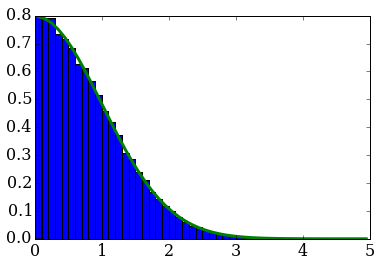

In [11]:
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    # Distribute g according to the exponential distribution
    g = numpy.log(1/(1-u1))
    
    # Generate a second number for the acceptance/rejection condition
    u2 = numpy.random.random_sample()
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')


Not bad! The algorithm produces the proper distribution and the final set has approximately the expected size. 

There are of course many ways to implement the Von Neumann rejection method. Here is another more efficient one making use of the `numpy.extract` method:

Acceptance ratio: 0.71551


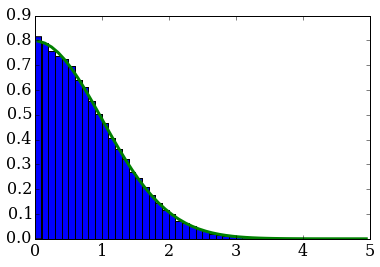

In [12]:
# Distribute g according to the exponential distribution
uniform1 = numpy.random.random_sample(N)
g = numpy.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = numpy.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = numpy.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = numpy.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')



## Challenge

1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.

2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

In [13]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())

FileNotFoundError: [Errno 2] No such file or directory: '../../styles/numericalmoocstyle.css'

 Exercice 1:  
 - Distribution exponentielle générée avec "$\textit{alea.exponential(.,.)}$":
 
 On importe depuis la bibliothèque $\textit{numpy}$ de python la fonction " $\textit{alea.exponential(scale,size)}$ " pour générer notre distribution exponentielle à partir d'un échantillon de taille N=100000 (qui correspond au nombre de nombres aléatoires).
 
 La courbe bleue est un "fit" de notre distribution par une fonction exponentielle de paramètre alpha et dont les valeurs de $x_c$ correspondent au centre des bins.
 
     

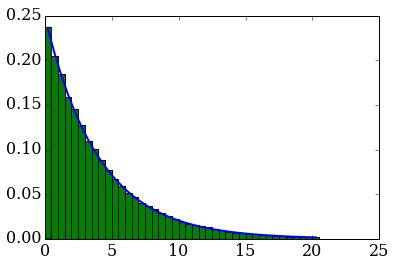

In [18]:
import numpy.random as alea
# paramètre de "rate"
alpha = 0.25

# distribution exponentielle
z=alea.exponential(4,size=N) 

#Graphe
binwidth=0.5
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(z,bins,normed='true',color='green');

# calcul du centre des bins
xc = bins[:-1] + binwidth/2

# Fit
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)

- Distribution gaussienne générée avec "$\textit{numpy.random.normal(.,.,.)}$":

    Grâce à la fonction "$\textit{numpy.random.normal(loc=.,scale=.,size=.)}$" on génère une distribution Gaussienne de moyenne (=loc) égale à 0 et d'écart-type (=scale) 1.0 à partir de N=100000 éléments (=size).

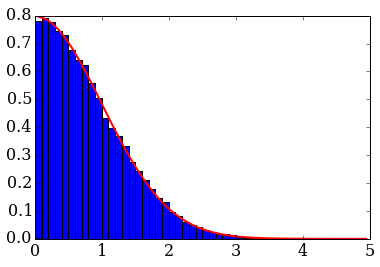

In [15]:
#Distribution gaussienne
g=numpy.random.normal(loc=0, scale=1.0, size=N)

#Graphe 
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(g,bins,normed='true',color='blue');

# calcul du centre des bins
xc = bins[:-1] + binwidth/2

# Fit
pyplot.plot(xc,2*numpy.exp(-(xc)**2/2.0)/numpy.sqrt(2*numpy.pi),lw=2,color='red')


- Comparaison des méthodes des distributions exponentielles & Gaussiennes.

  Après avoir généré les distributions et testé les différents paramètres (écart-types, moyenne, ...), on constate que les fonctions fournies par la librairie $\textit{Numpy}$ reproduisent correctement ce que les algorithmes ci-dessus produisent.

  Concernant les paramètres de la distribution exponentielle, une différence mérite d'être soulignée. Le paramètre utilisé dans la première méthode est le "rate", $\alpha$, tandis que dans la 2ème méthode il s'agit du paramètre d'échelle ("scale parameter"). La relation qui lie ces deux paramètres est donnée par : $\alpha=\frac{1}{"scale"parameter}$.

  Pour finir, on peut constater sur la figure çi-dessous que les graphes obtenus par les 2 méthodes se superposent. On en conclut que les deux méthodes donnent le même résultats.


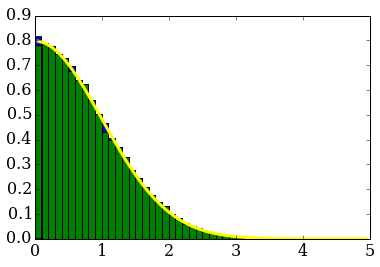

In [16]:

#Graphe par la méthode 1
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins,normed='true',color='blue');

#Graphe par la méthode 2
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(g,bins,normed='true',color='green');

# calcul du centre des bins
xc = bins[:-1] + binwidth/2

#Fit
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='yellow')


Exercice 2:

- Méthode Box-Muller:     
         
  Le but de la méthode Box-Muller est de générer des paires de nombres aléatoires qui suivent une distribution de loi normale. Ces distributions étant réalisées à partir d'un échantillon de nombre aléatoire uniformément distribué entre 0 et 1.

  A cette fin, nous réalisons l'algorithme suivant : 

In [ ]:
from numpy import random, sqrt, log, sin, cos, pi

m=0
s=1

# On définit 2 variables aléatoires indépendantes uniformément distribuées entre 0 et 1.
x1 = random.random_sample(100000)
x2 = random.random_sample(100000)

# On définit les fonctions de transformation.

y1 = sqrt(-2*log(x1))*cos(2*pi*x2)
y2 = sqrt(-2*log(x1))*sin(2*pi*x2)


# On passe d'une loi normale réduite à une loi normale de moyenne m et d'écart type s.
z1=m+s*y1
z2=m+s*y2

# Graphe de z1
binwidth=0.1
bins=numpy.arange(-5.1,5.1, binwidth)
pyplot.hist(z1,bins,normed='true',color='blue');


# Calcul du centre des bins
xc = bins[:-1] + binwidth/2

# Courbe d'ajustement
pyplot.plot(xc,numpy.exp(-(xc-m)**2/2.0*s**2)/numpy.sqrt(2*numpy.pi)*s,lw=2,color='red')



In [ ]:

# Graphe de z2
binwidth=0.1
bins=numpy.arange(-5.1,5.1, binwidth)
pyplot.hist(z2,bins,normed='true',color='green');

# Calcul du centre des bins
xc = bins[:-1] + binwidth/2

# Courbe d'ajustement
pyplot.plot(xc,numpy.exp(-(xc-m)**2/2.0*s**2)/numpy.sqrt(2*numpy.pi)*s,lw=2,color='red')



- Explication du principe de la méthode:
   
   Nous partons de deux séries de nombres aléatoires uniforméments distribués sur l'intervalle $[0,1]$. Nous utilisons ensuite les transformations suivantes :
   
$$ y_1 = Rcos(\theta)=\sqrt{-2ln(x_1)}cos(2\pi x_2) $$
$$ y_2 = Rsin(\theta)=\sqrt{-2ln(x_1)}sin(2\pi x_2) $$

où le $ln$ a pour conséquence de concentrer les valeurs obtenues autour de 0. Par conséquent, nous avons une forte densité de valeurs obtenues par les transformations qui se traduit par une gaussienne centré sur ce point.
   
   Graphiquement, on peut voir que les deux séries de nombres aléatoire uniformément distribués forment des cercles concentriques (chaque couple ($x_1$,$x_2$) générant un cercle selon : $R^2=x^2_1+x^2_2$).
Les transformations ont pour conséquences d'envoyer les cercles les plus éloignés de 0 autour de ce dernier et vice versa, tout en augmentant la densité dans le voisinage de 0 d'après ce qui a été expliqué précédemment. C'est ce qui est représenté sur la figure ci dessous.

<img src="./figures/BOX.png" alt="Drawing" style="width: 150px;"/>
$$ Représentation graphique de la transformation. Le jeu de couleur permet de visualiser l'inversion et la concentration des cercles concentriques.
Source: https://fr.wikipedia.org/wiki/M\%C3\%A9thode_de_Box-Muller#/media/File:Box_Muller.svg$$


- Sources de la méthode Box-Müller:
    
http://www.unilim.fr/pages_perso/jean.debord/math/random/random.htm#III.B

https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Box-Muller 
    